In [43]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import cv2
import pykitti

In [48]:
basedir = 'D:\Thesis\Kitti\Raw'
date = '2011_09_28'
drive = '0043'
dataset = pykitti.raw(basedir, date, drive, frames=range(0, 20, 5))

In [65]:
rot = np.array([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
point_velo = np.array([0,0,0,1])
point_cam0 = dataset.calib.T_cam0_velo.dot(point_velo)
point_cam0 = point_cam0.dot(rot)
point_cam0

array([-0.0224,  0.0597,  0.3325,  1.    ])

In [62]:
dataset.calib.T_cam0_velo

array([[-0.0016, -0.9999, -0.0128, -0.0224],
       [-0.0053,  0.0128, -0.9999, -0.0597],
       [ 1.    , -0.0015, -0.0053, -0.3325],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

In [50]:
# Grab some data
second_pose = next(iter(itertools.islice(dataset.oxts, 1, None))).T_w_imu
first_gray = next(iter(dataset.gray))
first_cam1 = next(iter(dataset.cam1))
first_rgb = next(iter(dataset.rgb))
first_cam2 = next(iter(dataset.cam2))
third_velo = next(iter(itertools.islice(dataset.velo, 2, None)))

In [68]:
points_cam0 = dataset.calib.T_cam0_velo.dot(third_velo.T)
points_cam0 = point_cam0.dot(rot)
points_cam0

array([-0.0224, -0.0597, -0.3325,  1.    ])

In [51]:
# Display some of the data
np.set_printoptions(precision=4, suppress=True)
print('\nDrive: ' + str(dataset.drive))
print('\nFrame range: ' + str(dataset.frames))


Drive: 2011_09_28_drive_0043_sync

Frame range: range(0, 20, 5)


In [52]:
print('\nIMU-to-Velodyne transformation:\n' + str(dataset.calib.T_velo_imu))
print('\nGray stereo pair baseline [m]: ' + str(dataset.calib.b_gray))
print('\nRGB stereo pair baseline [m]: ' + str(dataset.calib.b_rgb))


IMU-to-Velodyne transformation:
[[ 1.      0.0008 -0.002  -0.8087]
 [-0.0008  0.9999 -0.0148  0.3196]
 [ 0.002   0.0148  0.9999 -0.7997]
 [ 0.      0.      0.      1.    ]]

Gray stereo pair baseline [m]: 0.537139651041

RGB stereo pair baseline [m]: 0.537255922994


In [53]:
print('\nFirst timestamp: ' + str(dataset.timestamps[0]))
print('\nSecond IMU pose:\n' + str(second_pose))


First timestamp: 2011-09-28 12:50:02.014800

Second IMU pose:
[[ 0.929   0.3683  0.0373  0.0026]
 [-0.3678  0.9297 -0.0194 -0.    ]
 [-0.0418  0.0043  0.9991 -0.0072]
 [ 0.      0.      0.      1.    ]]


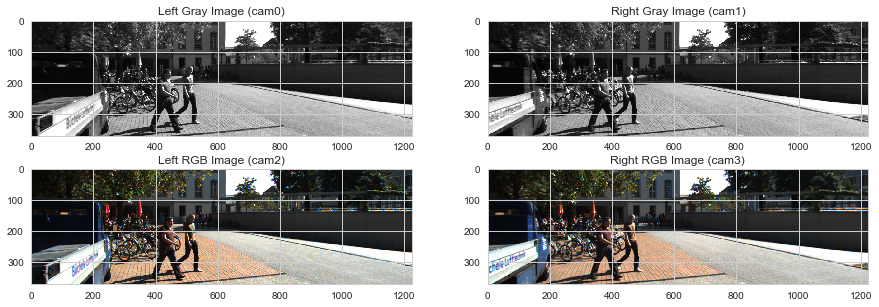

In [54]:
f, ax = plt.subplots(2, 2, figsize=(15, 5))
ax[0, 0].imshow(first_gray[0], cmap='gray')
ax[0, 0].set_title('Left Gray Image (cam0)')

ax[0, 1].imshow(first_cam1, cmap='gray')
ax[0, 1].set_title('Right Gray Image (cam1)')

ax[1, 0].imshow(first_cam2)
ax[1, 0].set_title('Left RGB Image (cam2)')

ax[1, 1].imshow(first_rgb[1])
ax[1, 1].set_title('Right RGB Image (cam3)')

In [55]:
f2 = plt.figure()
ax2 = f2.add_subplot(111, projection='3d')
# Plot every 100th point so things don't get too bogged down
velo_range = range(0, third_velo.shape[0], 100)
ax2.scatter(third_velo[velo_range, 0],
            third_velo[velo_range, 1],
            third_velo[velo_range, 2],
            c=third_velo[velo_range, 3],
            cmap='gray')
ax2.set_title('Third Velodyne scan (subsampled)')

plt.show()

ValueError: Unknown projection '3d'